In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

# Import Data

# Read data from CSV file into a pandas DataFrame
df = pd.read_csv('../data/processed/cost_data.csv', encoding='utf-8')

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Define Poisson regression loss function
def poisson_regression_loss(params, X, y):
    intercept, beta = params
    lambda_ = np.exp(intercept + beta * X)
    return -np.sum(y * np.log(lambda_) - lambda_)

# Create a lag for 'Mildew Incidence'
df['Mildew_Lag'] = df.groupby('Field ID')['Mildew Incidence'].shift(1)

# Filter data for each month
may_data = df[df['Month'] == 'May']
june_data = df[df['Month'] == 'June']
july_data = df[df['Month'] == 'July']

# Poisson Regression for May-June
X_may_june = june_data['Mildew_Lag'].dropna()
y_may_june = june_data.loc[X_may_june.index, 'Sprays']
result_may_june = minimize(poisson_regression_loss, x0=[0, 0], args=(X_may_june, y_may_june))
print("May-June Regression Coefficients:", result_may_june.x)

# Poisson Regression for June-July
X_june_july = july_data['Mildew_Lag'].dropna()
y_june_july = july_data.loc[X_june_july.index, 'Sprays']
result_june_july = minimize(poisson_regression_loss, x0=[0, 0], args=(X_june_july, y_june_july))
print("June-July Regression Coefficients:", result_june_july.x)


May-June Regression Coefficients: [0.44469681 2.04043031]
June-July Regression Coefficients: [0.29325288 0.2545871 ]


C:\Users\joshf\AppData\Local\Temp\ipykernel_32892\3468571348.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=june_data['Sprays'], y=june_data['Mildew_Lag'], palette="Blues", inner="quartile")


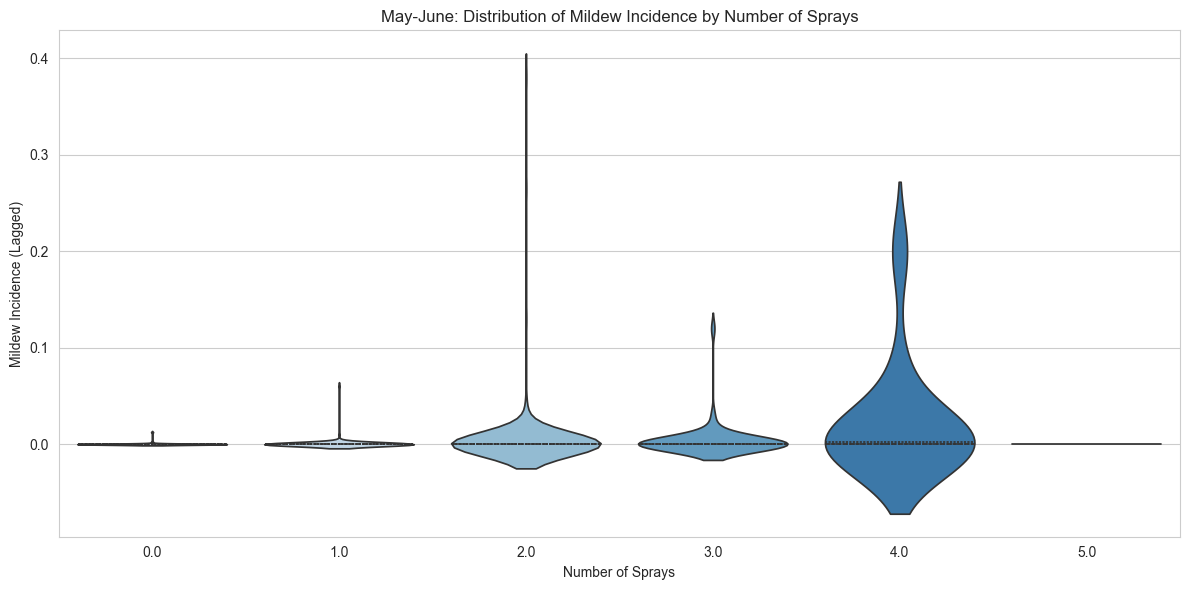

C:\Users\joshf\AppData\Local\Temp\ipykernel_32892\3468571348.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=july_data['Sprays'], y=july_data['Mildew_Lag'], palette="Reds", inner="quartile")


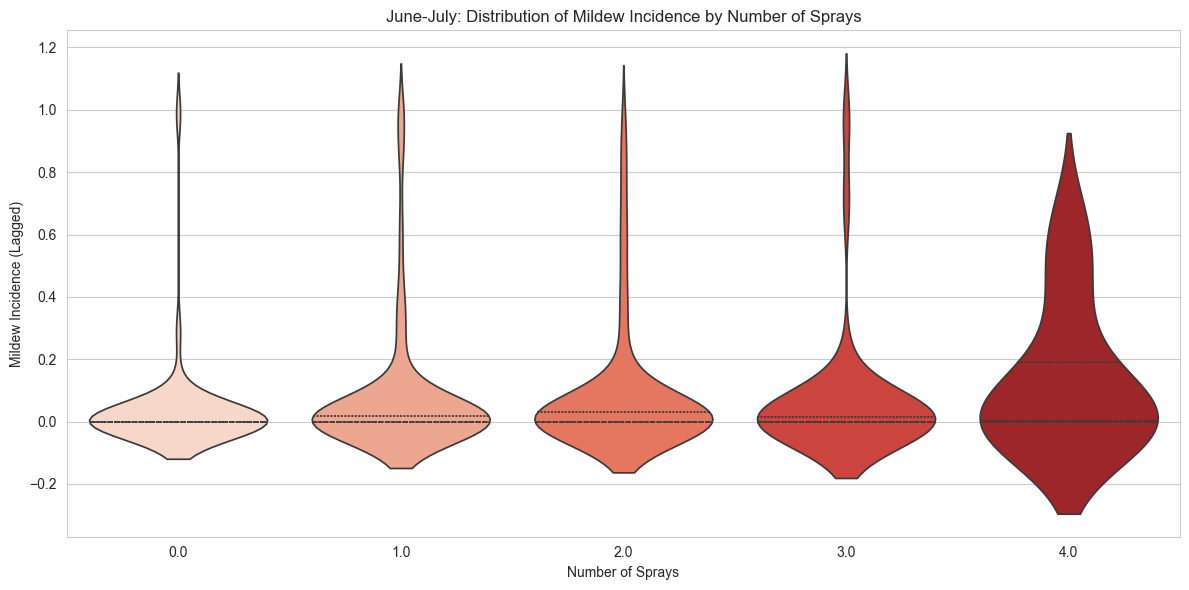

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a lag for 'Mildew Incidence'
df['Mildew_Lag'] = df.groupby('Field ID')['Mildew Incidence'].shift(1)

# Filter data for each month
june_data = df[df['Month'] == 'June']
july_data = df[df['Month'] == 'July']

# Setup Seaborn aesthetics
sns.set_style("whitegrid")

# Plot for May-June
plt.figure(figsize=(12, 6))
sns.violinplot(x=june_data['Sprays'], y=june_data['Mildew_Lag'], palette="Blues", inner="quartile")
plt.title('May-June: Distribution of Mildew Incidence by Number of Sprays')
plt.xlabel('Number of Sprays')
plt.ylabel('Mildew Incidence (Lagged)')
plt.tight_layout()
plt.show()

# Plot for June-July
plt.figure(figsize=(12, 6))
sns.violinplot(x=july_data['Sprays'], y=july_data['Mildew_Lag'], palette="Reds", inner="quartile")
plt.title('June-July: Distribution of Mildew Incidence by Number of Sprays')
plt.xlabel('Number of Sprays')
plt.ylabel('Mildew Incidence (Lagged)')
plt.tight_layout()
plt.show()


C:\Users\joshf\AppData\Local\Temp\ipykernel_32892\3014081289.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=june_data['Sprays'], y=june_data['Mildew Incidence'], palette="Blues", inner="quartile")


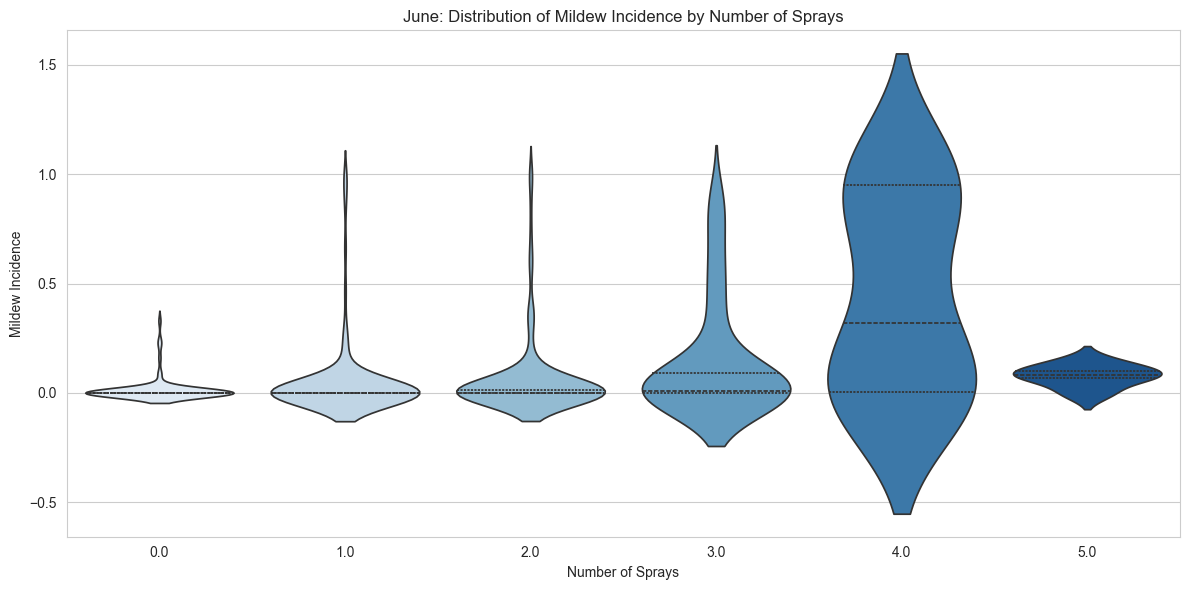

C:\Users\joshf\AppData\Local\Temp\ipykernel_32892\3014081289.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=july_data['Sprays'], y=july_data['Mildew Incidence'], palette="Reds", inner="quartile")


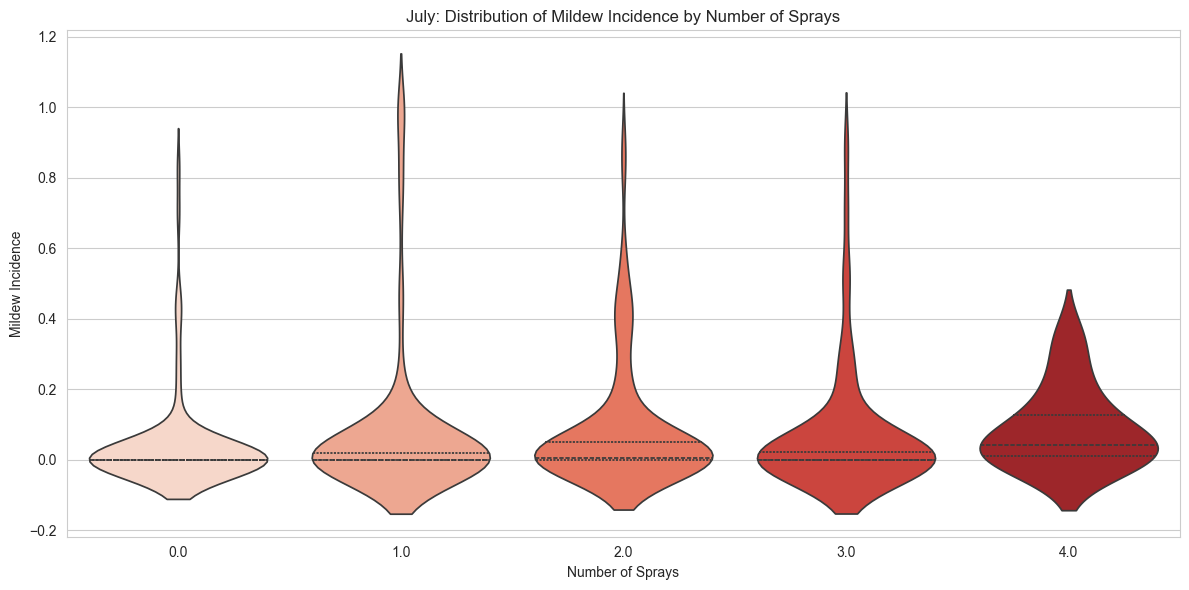

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Filter data for June and July
june_data = df[df['Month'] == 'June']
july_data = df[df['Month'] == 'July']

# Note: A comprehensive approach would fit the poisson regression model here,
# but for simplicity, we're going directly to visualization.

# Setup Seaborn aesthetics
sns.set_style("whitegrid")

# Violin plot for June
plt.figure(figsize=(12, 6))
sns.violinplot(x=june_data['Sprays'], y=june_data['Mildew Incidence'], palette="Blues", inner="quartile")
plt.title('June: Distribution of Mildew Incidence by Number of Sprays')
plt.xlabel('Number of Sprays')
plt.ylabel('Mildew Incidence')
plt.tight_layout()
plt.show()

# Violin plot for July
plt.figure(figsize=(12, 6))
sns.violinplot(x=july_data['Sprays'], y=july_data['Mildew Incidence'], palette="Reds", inner="quartile")
plt.title('July: Distribution of Mildew Incidence by Number of Sprays')
plt.xlabel('Number of Sprays')
plt.ylabel('Mildew Incidence')
plt.tight_layout()
plt.show()


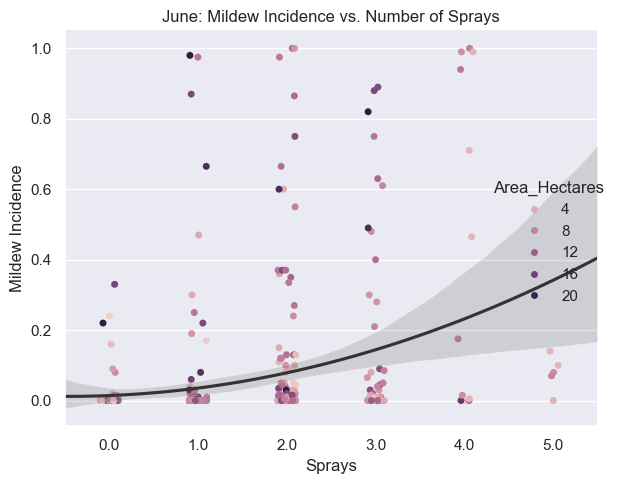

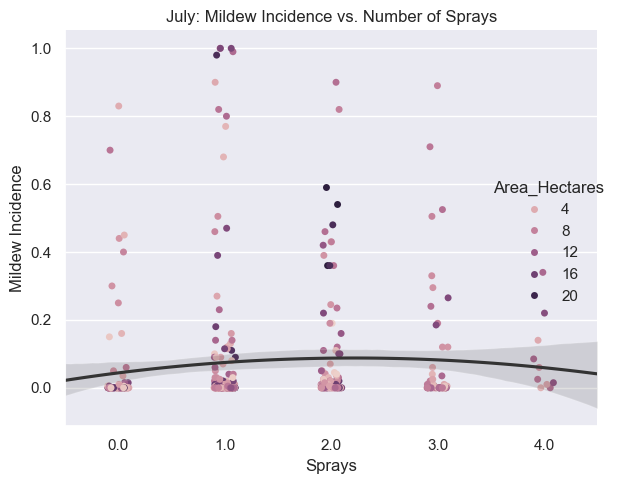

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for June
june_data = df[df['Month'] == 'June']

sns.set_theme()

# Strip plot for June data
sns.catplot(
    data=june_data, x="Sprays", y="Mildew Incidence", hue="Area_Hectares",
    jitter=True, zorder=1
)

# Regression fit
sns.regplot(
    data=june_data, x="Sprays", y="Mildew Incidence",
    scatter=False, truncate=False, order=2, color=".2",
)

plt.title('June: Mildew Incidence vs. Number of Sprays')
plt.tight_layout()
plt.show()

# Repeat for July
july_data = df[df['Month'] == 'July']

# Strip plot for July data
sns.catplot(
    data=july_data, x="Sprays", y="Mildew Incidence", hue="Area_Hectares",
    jitter=True, zorder=1
)

# Regression fit
sns.regplot(
    data=july_data, x="Sprays", y="Mildew Incidence",
    scatter=False, truncate=False, order=2, color=".2",
)

plt.title('July: Mildew Incidence vs. Number of Sprays')
plt.tight_layout()
plt.show()


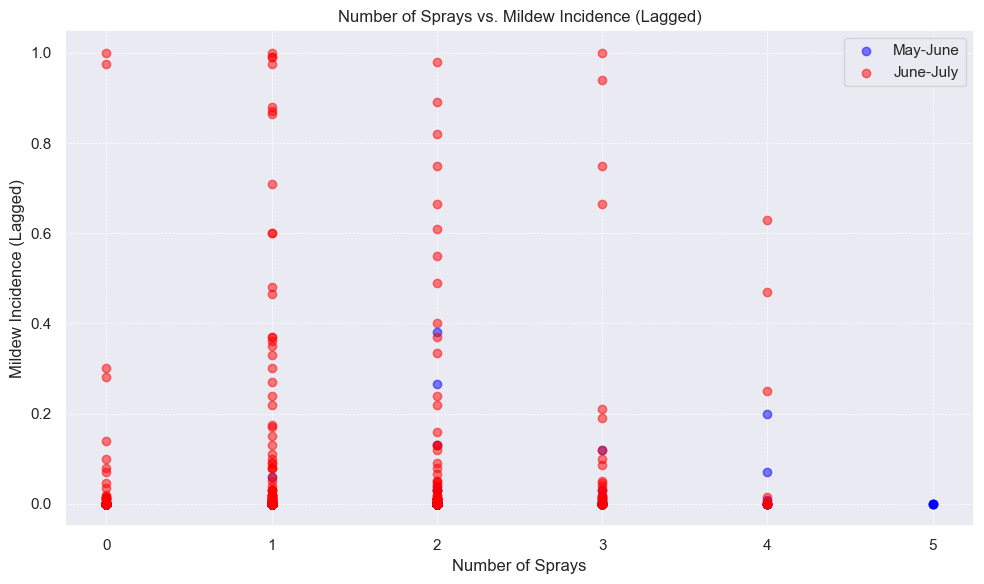

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a lag for 'Mildew Incidence'
df['Mildew_Lag'] = df.groupby('Field ID')['Mildew Incidence'].shift(1)

# Filter data for each month
june_data = df[df['Month'] == 'June']
july_data = df[df['Month'] == 'July']

# Extract the data for plotting
X_may_june = june_data['Mildew_Lag'].dropna()
y_may_june = june_data.loc[X_may_june.index, 'Sprays']

X_june_july = july_data['Mildew_Lag'].dropna()
y_june_july = july_data.loc[X_june_july.index, 'Sprays']

# Create the plot
plt.figure(figsize=(10, 6))

# Swapping axes here
plt.scatter(y_may_june, X_may_june, label="May-June", color='blue', alpha=0.5)
plt.scatter(y_june_july, X_june_july, label="June-July", color='red', alpha=0.5)

# Updating labels accordingly
plt.ylabel('Mildew Incidence (Lagged)')
plt.xlabel('Number of Sprays')
plt.title('Number of Sprays vs. Mildew Incidence (Lagged)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


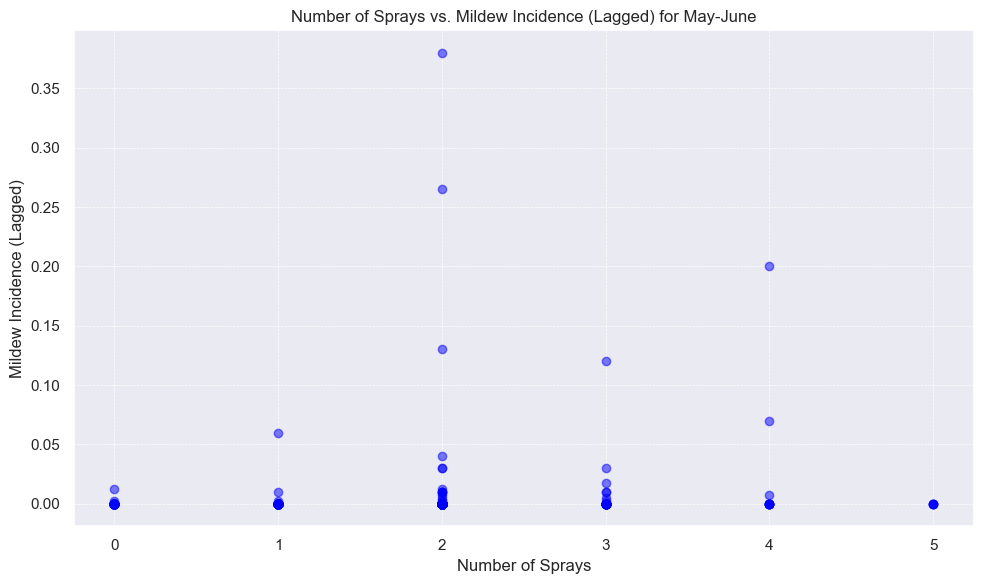

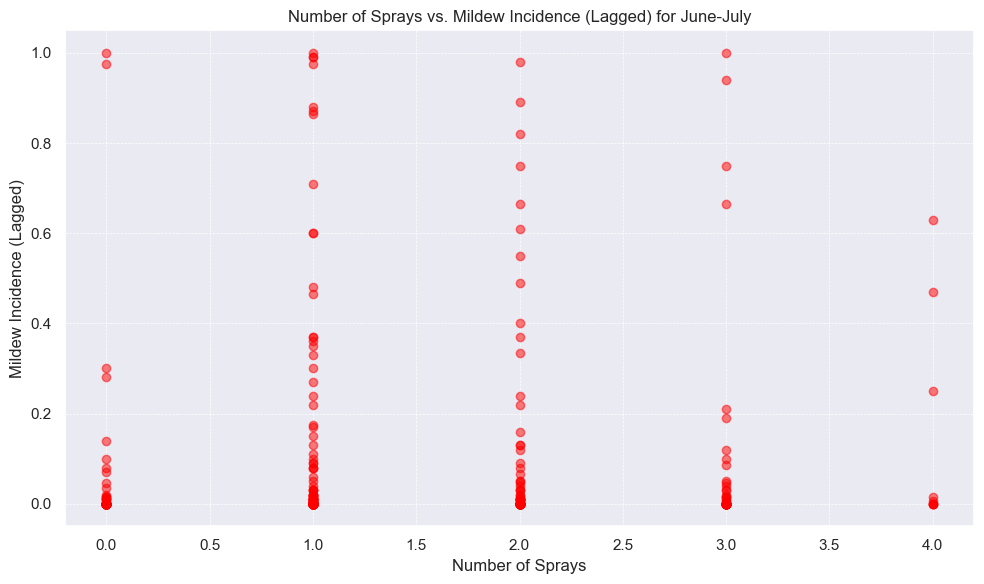

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a lag for 'Mildew Incidence'
df['Mildew_Lag'] = df.groupby('Field ID')['Mildew Incidence'].shift(1)

# Filter data for each month
june_data = df[df['Month'] == 'June']
july_data = df[df['Month'] == 'July']

# Extract the data for plotting
X_may_june = june_data['Mildew_Lag'].dropna()
y_may_june = june_data.loc[X_may_june.index, 'Sprays']

X_june_july = july_data['Mildew_Lag'].dropna()
y_june_july = july_data.loc[X_june_july.index, 'Sprays']

# Create scatter plot for May-June
plt.figure(figsize=(10, 6))
plt.scatter(y_may_june, X_may_june, color='blue', alpha=0.5)
plt.ylabel('Mildew Incidence (Lagged)')
plt.xlabel('Number of Sprays')
plt.title('Number of Sprays vs. Mildew Incidence (Lagged) for May-June')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Create scatter plot for June-July
plt.figure(figsize=(10, 6))
plt.scatter(y_june_july, X_june_july, color='red', alpha=0.5)
plt.ylabel('Mildew Incidence (Lagged)')
plt.xlabel('Number of Sprays')
plt.title('Number of Sprays vs. Mildew Incidence (Lagged) for June-July')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
